<a href="https://www.kaggle.com/code/lalit7881/model-accuracy-comparison-random-forest-0-96?scriptVersionId=293232244" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-social-media-and-relationships/Students Social Media Addiction.csv


## Title:
Social Media & Student Relationships

## Description:
Social media has become an integral part of student life, shaping how friendships and relationships are formed, maintained, and perceived. Platforms such as Instagram, WhatsApp, and Snapchat allow students to stay connected beyond physical boundaries, enabling instant communication, emotional support, and social belonging. For many students, social media strengthens relationships by helping them share experiences, express feelings, and maintain long-distance connections.

However, excessive use of social media can also introduce challenges. Constant comparison, online validation through likes and comments, and miscommunication can lead to misunderstandings, jealousy, and emotional stress in relationships. Students may experience reduced face-to-face interaction, impacting the depth and authenticity of personal connections. Privacy concerns and digital conflicts can further strain relationships if not managed carefully.

Overall, social media plays a dual role in student relationships—it can enhance connectivity and emotional bonding when used mindfully, but overuse or misuse may negatively affect trust, communication, and mental well-being. Developing healthy digital habits and balancing online and offline interactions is essential for nurturing strong and meaningful relationships among students.

## Import dataset

In [2]:
df = pd.read_csv("/kaggle/input/student-social-media-and-relationships/Students Social Media Addiction.csv")

In [3]:
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [4]:
df.tail()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
700,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9
702,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7
703,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4
704,705,19,Female,Undergraduate,Poland,6.2,Facebook,Yes,6.3,5,Single,4,8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

In [6]:
df.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

In [8]:
df.shape

(705, 13)

In [9]:
df.columns

Index(['Student_ID', 'Age', 'Gender', 'Academic_Level', 'Country',
       'Avg_Daily_Usage_Hours', 'Most_Used_Platform',
       'Affects_Academic_Performance', 'Sleep_Hours_Per_Night',
       'Mental_Health_Score', 'Relationship_Status',
       'Conflicts_Over_Social_Media', 'Addicted_Score'],
      dtype='object')

In [10]:
df.isnull().sum()

Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

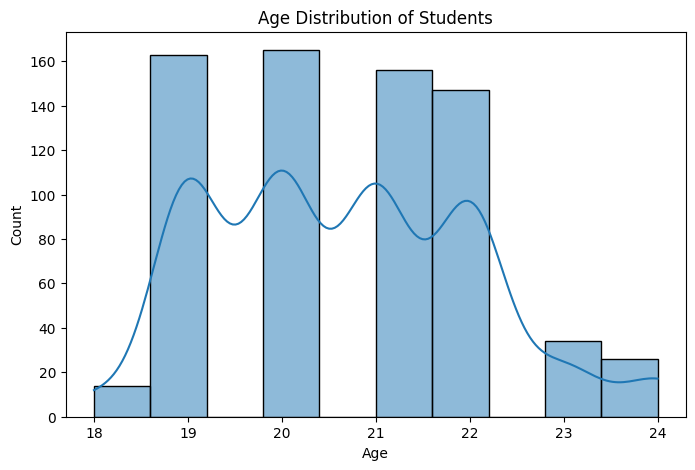

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Age Distribution of Students')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


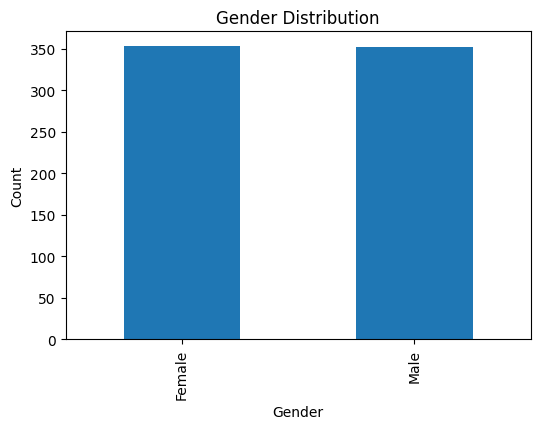

In [13]:
plt.figure(figsize=(6,4))
df['Gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


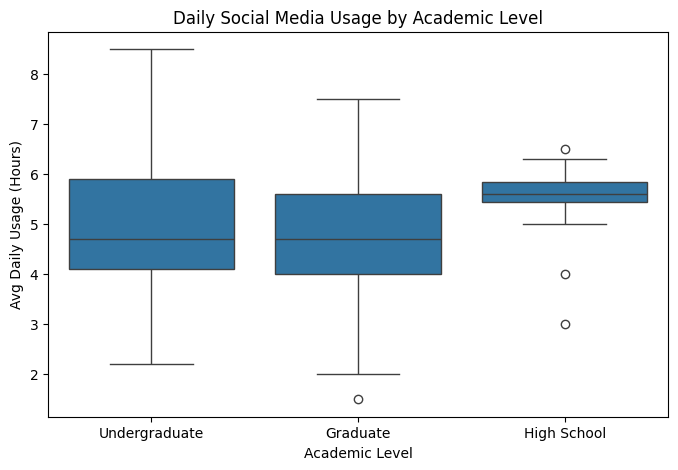

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Academic_Level', y='Avg_Daily_Usage_Hours', data=df)
plt.title('Daily Social Media Usage by Academic Level')
plt.xlabel('Academic Level')
plt.ylabel('Avg Daily Usage (Hours)')
plt.show()


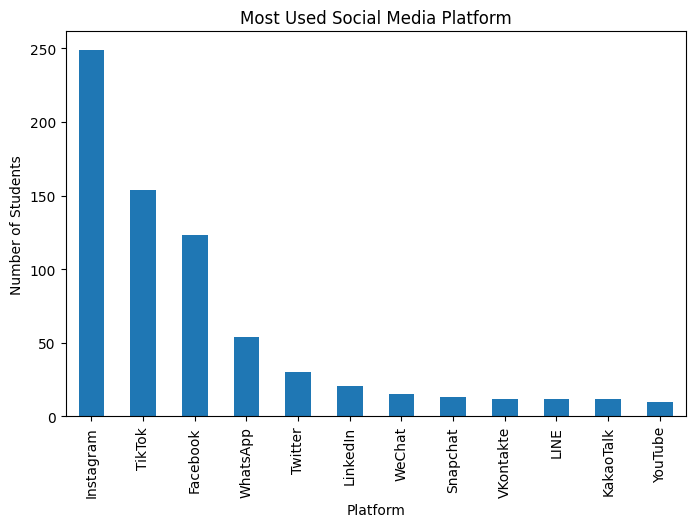

In [15]:
plt.figure(figsize=(8,5))
df['Most_Used_Platform'].value_counts().plot(kind='bar')
plt.title('Most Used Social Media Platform')
plt.xlabel('Platform')
plt.ylabel('Number of Students')
plt.show()


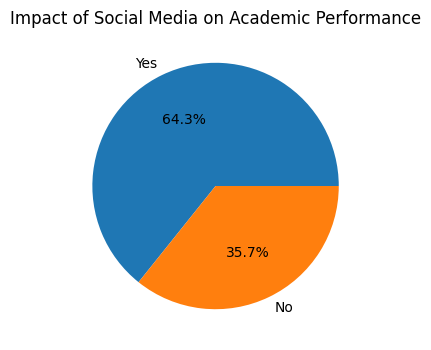

In [16]:
plt.figure(figsize=(6,4))
df['Affects_Academic_Performance'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Impact of Social Media on Academic Performance')
plt.ylabel('')
plt.show()


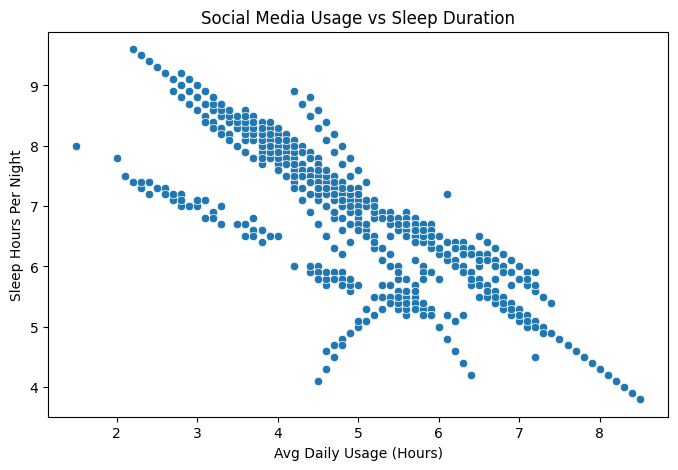

In [17]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Avg_Daily_Usage_Hours', y='Sleep_Hours_Per_Night', data=df)
plt.title('Social Media Usage vs Sleep Duration')
plt.xlabel('Avg Daily Usage (Hours)')
plt.ylabel('Sleep Hours Per Night')
plt.show()


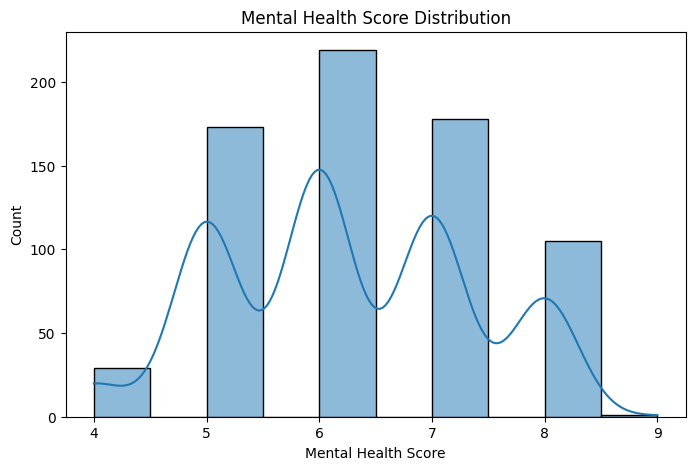

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(df['Mental_Health_Score'], bins=10, kde=True)
plt.title('Mental Health Score Distribution')
plt.xlabel('Mental Health Score')
plt.ylabel('Count')
plt.show()


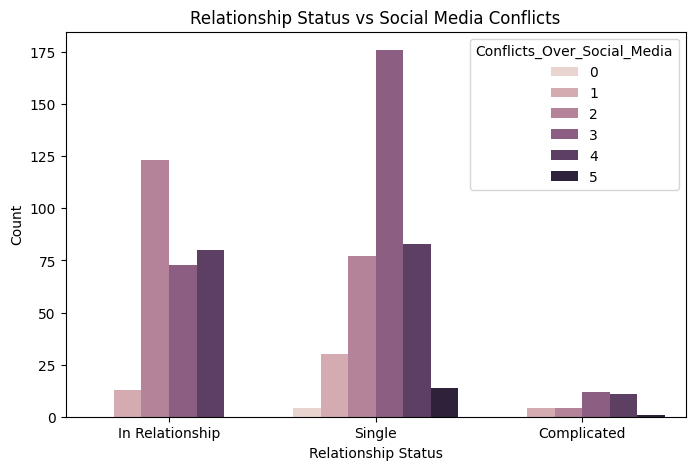

In [19]:
plt.figure(figsize=(8,5))
sns.countplot(x='Relationship_Status', hue='Conflicts_Over_Social_Media', data=df)
plt.title('Relationship Status vs Social Media Conflicts')
plt.xlabel('Relationship Status')
plt.ylabel('Count')
plt.show()


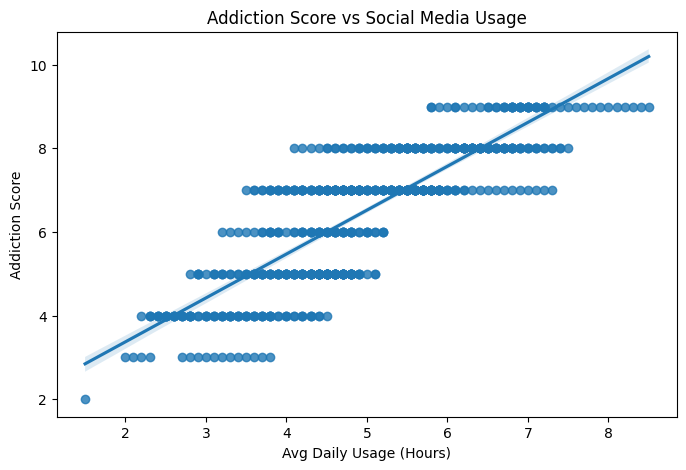

In [20]:
plt.figure(figsize=(8,5))
sns.regplot(x='Avg_Daily_Usage_Hours', y='Addicted_Score', data=df)
plt.title('Addiction Score vs Social Media Usage')
plt.xlabel('Avg Daily Usage (Hours)')
plt.ylabel('Addiction Score')
plt.show()


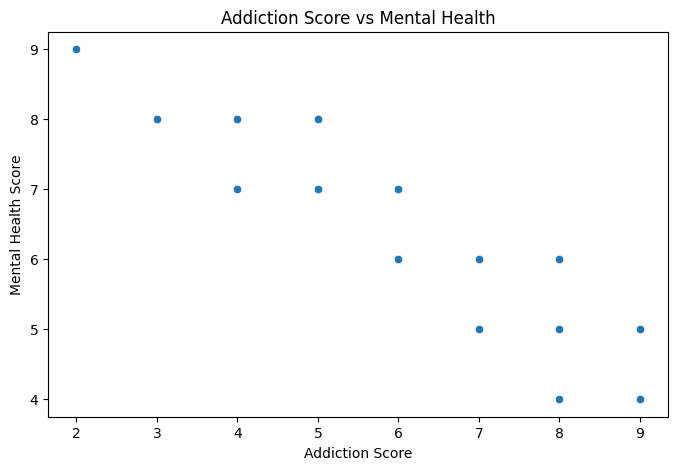

In [21]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Addicted_Score', y='Mental_Health_Score', data=df)
plt.title('Addiction Score vs Mental Health')
plt.xlabel('Addiction Score')
plt.ylabel('Mental Health Score')
plt.show()


## ML

In [22]:
from sklearn.preprocessing import LabelEncoder

# Identify all categorical columns
categorical_cols = ['Gender', 'Academic_Level', 'Most_Used_Platform', 
                    'Relationship_Status', 'Affects_Academic_Performance', 
                    'Conflicts_Over_Social_Media', 'Country']  # include Country

# Apply Label Encoding
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [23]:
from sklearn.model_selection import train_test_split

X = df.drop(['Student_ID', 'Mental_Health_Score'], axis=1)
y = df['Mental_Health_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

models = {
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

accuracy_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)  # now it should work
    y_pred = model.predict(X_test)
    accuracy_results[name] = accuracy_score(y_test, y_pred)

accuracy_results


{'Random Forest': 0.9645390070921985,
 'SVM': 0.36879432624113473,
 'Logistic Regression': 0.8226950354609929}

In [25]:
import pandas as pd

accuracy_df = pd.DataFrame(list(accuracy_results.items()), columns=['Model', 'Accuracy'])
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False)
print(accuracy_df)


                 Model  Accuracy
0        Random Forest  0.964539
2  Logistic Regression  0.822695
1                  SVM  0.368794


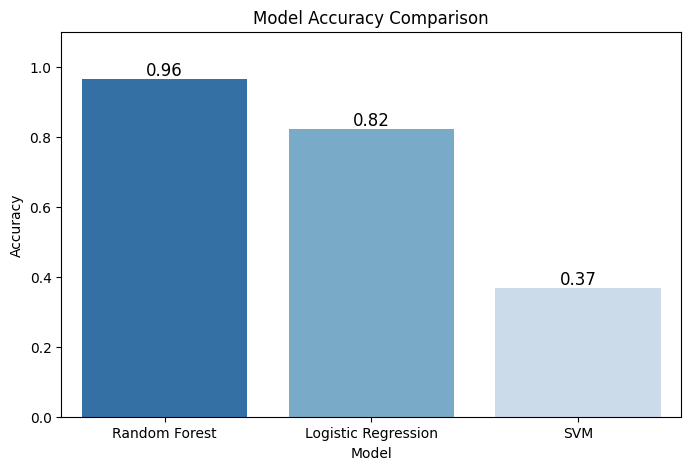

In [26]:
accuracy_df = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression', 'SVM'],
    'Accuracy': [0.964539, 0.822695, 0.368794]
})

# Sort models by accuracy for better visualization
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='Blues_r')

# Add value labels on top of bars
for index, row in accuracy_df.iterrows():
    plt.text(index, row['Accuracy'] + 0.01, f"{row['Accuracy']:.2f}", ha='center', fontsize=12)

plt.title('Model Accuracy Comparison')
plt.ylim(0, 1.1)  # Add some space above bars
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()


## Thank you..pls upvote!!!!